# DD1318 - Övning 9

Welcome! This is a Colab Notebook. It enables us to run small blocks of python, show graphical output and have some explanatory bits of text inbetween. You can run it here in the browser or locally by using jupyter. Try pressing the play button to the left of the following code snippet!

In [1]:
print("Hello World!")

Hello World!


## Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

import skimage.io
from skimage.transform import resize
from skimage.util import img_as_float

from scipy.fftpack import fft

We also pre-load some images from my personal google drive folder




In [3]:
!wget "https://raw.githubusercontent.com/gschup/dd1318_notebooks/main/images/duck.jpg"
!wget "https://raw.githubusercontent.com/gschup/dd1318_notebooks/main/images/spfx.jpg"

--2023-05-01 16:32:49--  https://raw.githubusercontent.com/gschup/dd1318_notebooks/main/images/duck.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18491 (18K) [image/jpeg]
Saving to: ‘duck.jpg’

duck.jpg            100%[===================>]  18.06K  --.-KB/s    in 0s      

2023-05-01 16:32:49 (72.5 MB/s) - ‘duck.jpg’ saved [18491/18491]

--2023-05-01 16:32:49--  https://raw.githubusercontent.com/gschup/dd1318_notebooks/main/images/spfx.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61115 (60K) [image/jpeg]
Saving to: ‘

### Image Manipulation

(720, 1280, 3)


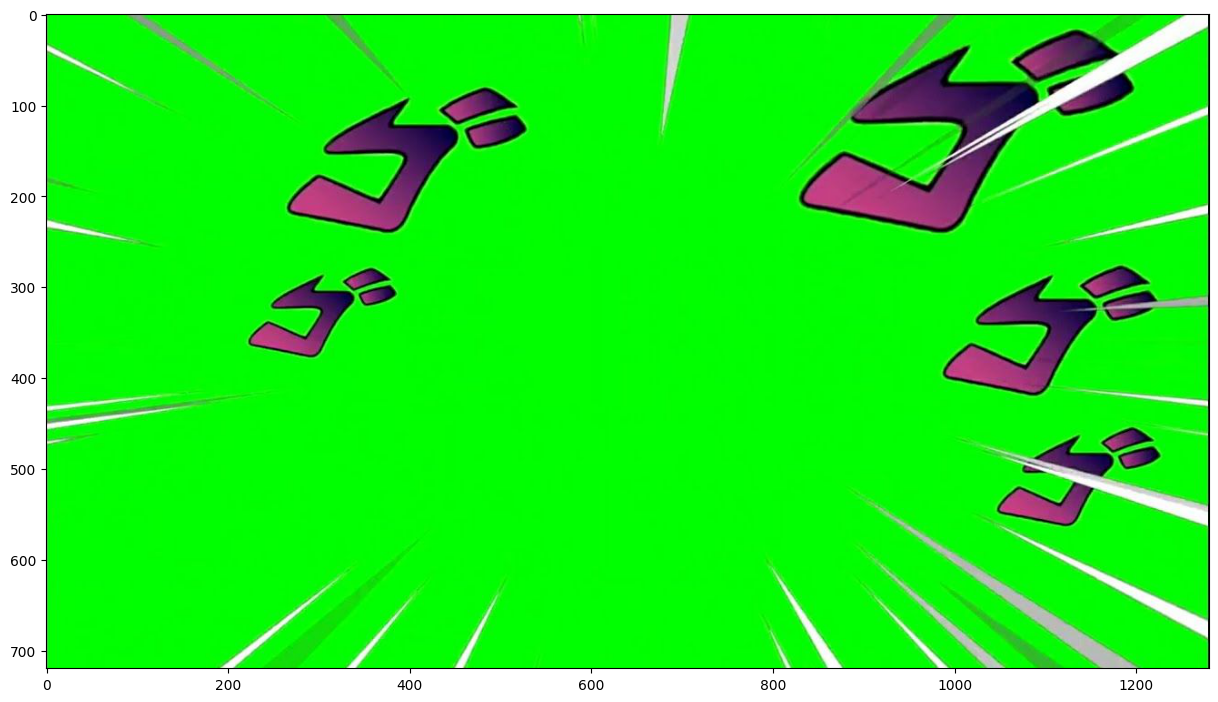

(360, 480, 3)


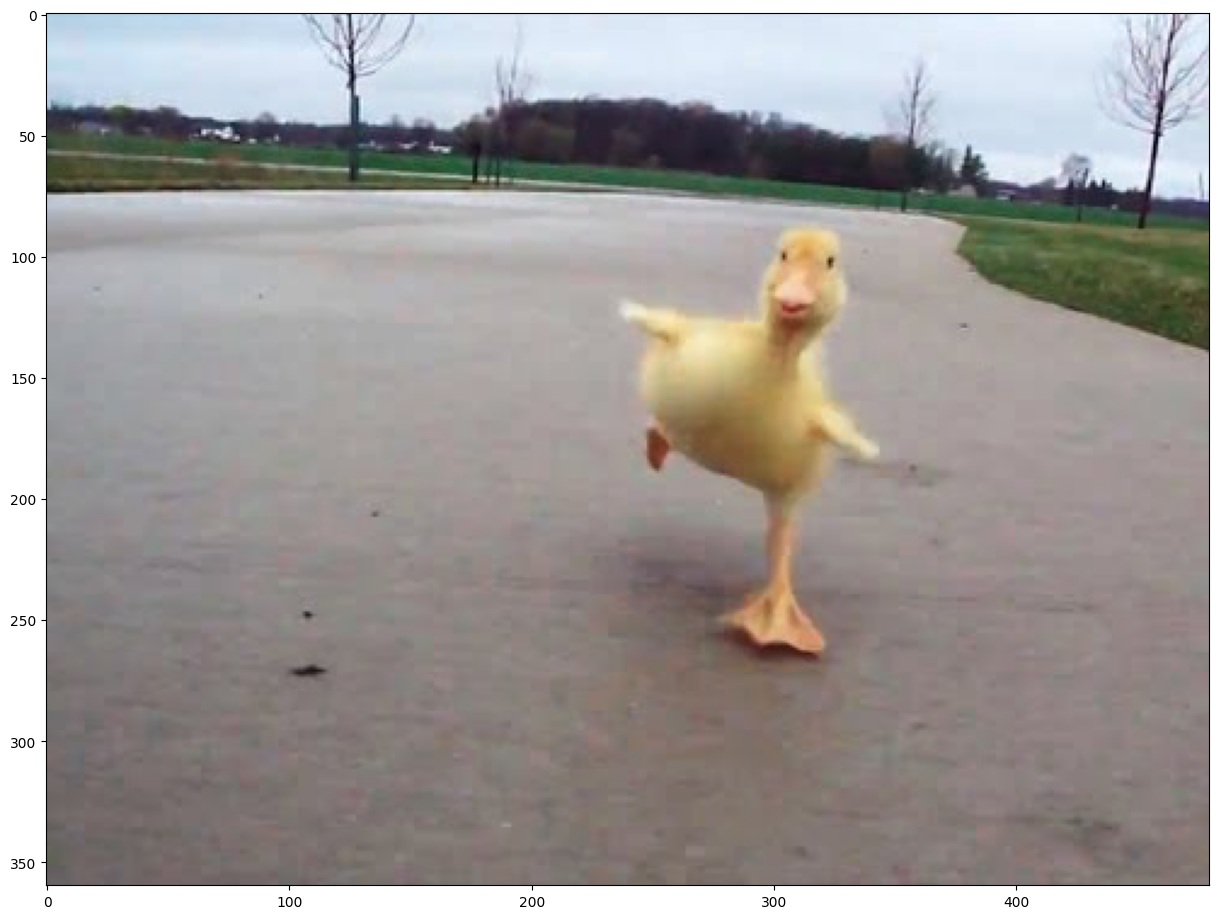

In [4]:
# when loading an image with skimage, we get a numpy array
duck = skimage.io.imread("./duck.jpg")
spfx = skimage.io.imread("./spfx.jpg")

print(spfx.shape)
plt.imshow(spfx)
plt.show()
print(duck.shape)
plt.imshow(duck)
plt.show()

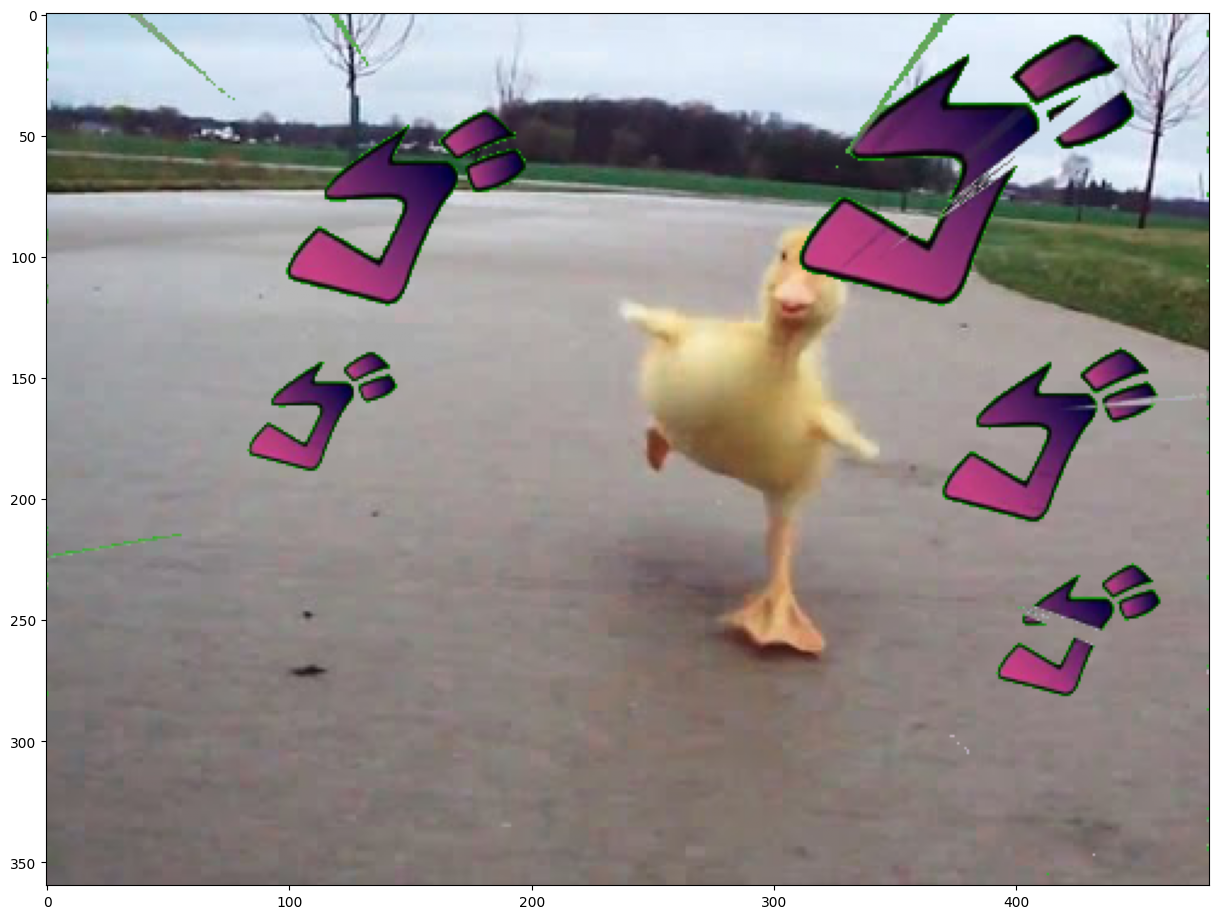

In [5]:
# make the spfx image fit to duck image size
spfx = resize(spfx, (duck.shape[0], duck.shape[1]), anti_aliasing=False)
duck = img_as_float(duck)

spfx_is_green = spfx[:, :, 1] > 0.7
for i in range(spfx.shape[0]):
  for j in range(spfx.shape[1]):
    if spfx_is_green[i, j]:
      spfx[i, j, :] = duck[i, j, :]

plt.imshow(spfx)
plt.show()

(360, 480)


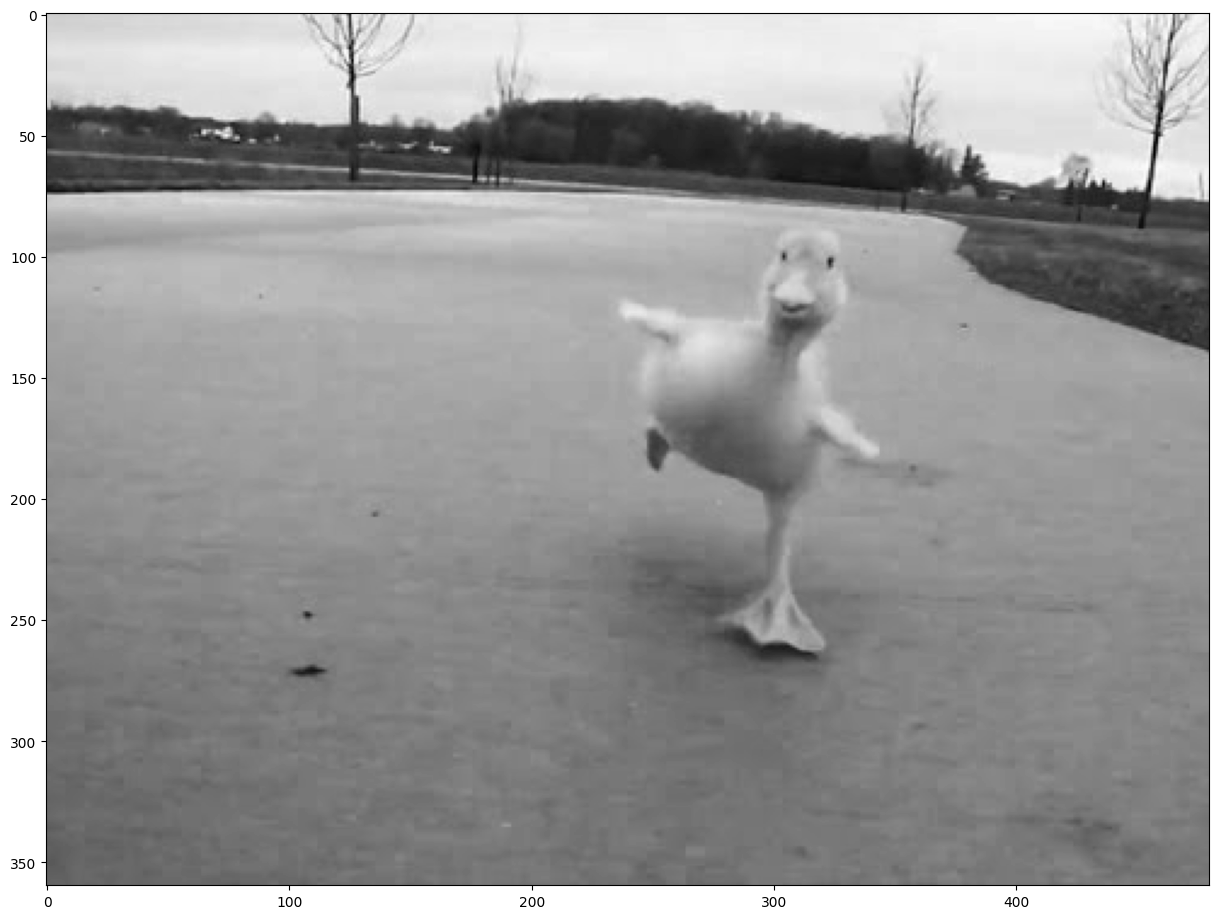

In [10]:
# Turn an image into grayscale
gray_duck = np.mean(duck, axis=2)
print(gray_duck.shape)
plt.imshow(gray_duck, cmap='gray')
plt.show()

## Fourier Transformation

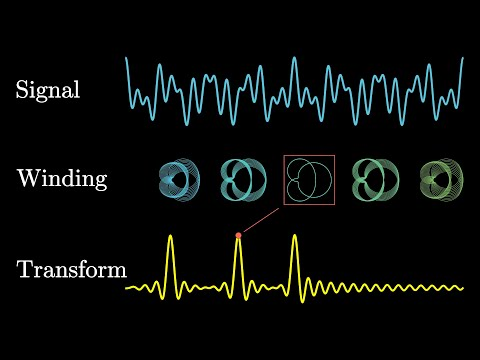

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('spUNpyF58BY')
# https://www.youtube.com/watch?v=spUNpyF58BY

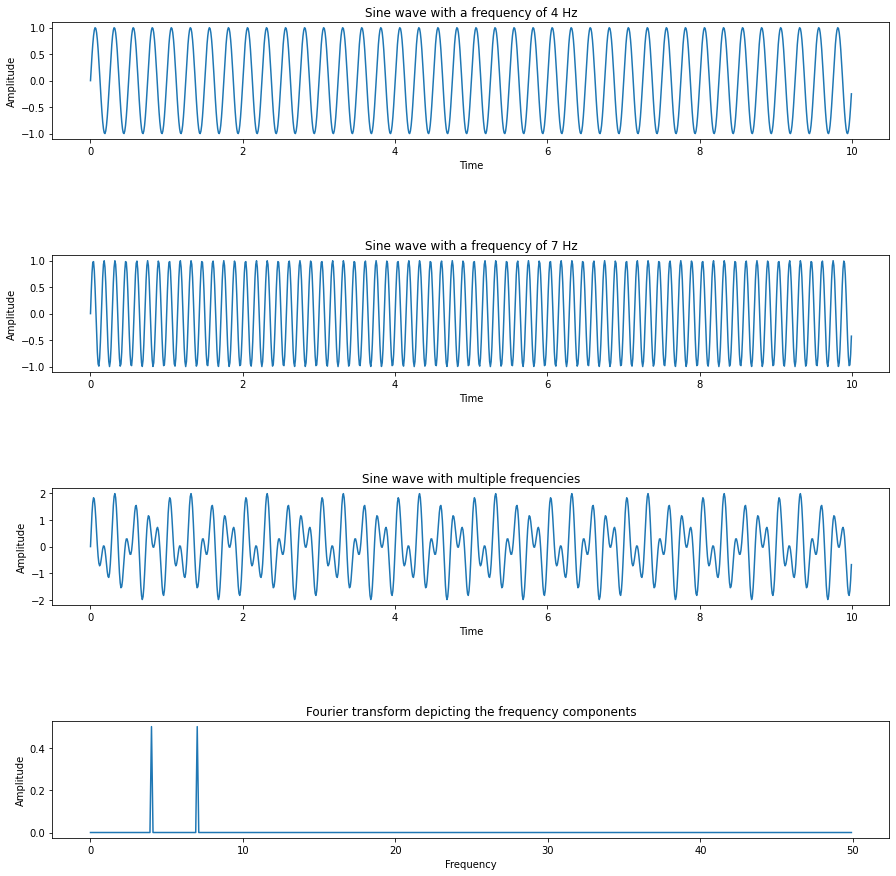

In [ ]:
# How many time points are needed i,e., Sampling Frequency
sampling_frequency = 100
# At what intervals time points are sampled
sampling_interval = 1 / sampling_frequency
# Begin time period of the signals
begin_time = 0
# End time period of the signals
end_time = 10
# Frequency of the signals
signal1_frequency = 4
signal2_frequency = 7
# Time points
time = np.arange(begin_time, end_time, sampling_interval)
# Create two sine waves
amplitude1 = np.sin(2 * np.pi * signal1_frequency * time)
amplitude2 = np.sin(2 * np.pi * signal2_frequency * time)
# Create subplot
figure, axis = plt.subplots(4, 1)
plt.subplots_adjust(hspace=1)

# Time domain representation for sine wave 1
axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')

# Time domain representation for sine wave 2
axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')

# Add the sine waves
amplitude = amplitude1 + amplitude2

# Time domain representation of the resultant sine wave
axis[2].set_title('Sine wave with multiple frequencies')
axis[2].plot(time, amplitude)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')

# Frequency domain representation
fourier_transform = np.fft.fft(amplitude) / len(amplitude)  # Normalize amplitude
fourier_transform = fourier_transform[range(int(len(amplitude) / 2))]  # Exclude sampling frequency
tp_count = len(amplitude)
values = np.arange(int(tp_count / 2))
time_period = tp_count / sampling_frequency
frequencies = values / time_period

# Frequency domain representation
axis[3].set_title('Fourier transform depicting the frequency components')
axis[3].plot(frequencies, abs(fourier_transform))
axis[3].set_xlabel('Frequency')
axis[3].set_ylabel('Amplitude')
plt.show()